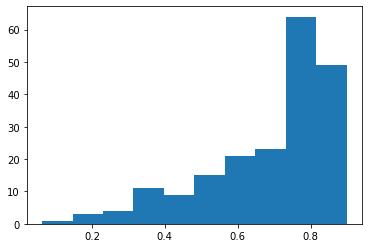

File name  File size  Unique columns  Mean r^2 value  \
0    CHEMBL1804.csv        818            1023        0.724745   
1    CHEMBL2854.csv        605            1023        0.666862   
2     CHEMBL332.csv       3459            1023        0.729949   
3    CHEMBL5251.csv        894            1023        0.339208   
4    CHEMBL5330.csv        949            1023        0.274731   
..              ...        ...             ...             ...   
195  CHEMBL5145.csv        747            1023        0.795398   
196   CHEMBL261.csv       3019            1023        0.628802   
197  CHEMBL3024.csv       1443            1023        0.758094   
198   CHEMBL308.csv       1852            1023        0.555121   
199   CHEMBL232.csv       1386            1023        0.630260   

     Median r^2 value  Mean MSE  Median MSE  Spearman coef rho  \
0            0.731645  0.501350    0.488783           0.873538   
1            0.665098  0.487336    0.489917           0.823245   
2            0.726269  0.380786    0.385974           0.846119   
3            0.355695  0.437660    0.426741           0.459803   
4            0.268451  0.449551    0.453443           0.563707   
..                ...       ...         ...                ...   
195          0.800999  0.628626    0.611417           0.867213   
196          0.625178  0.596811    0.602637           0.795022   
197          0.755353  0.306032    0.309499           0.701596   
198          0.559868  0.496050    0.490757           0.776578   
199          0.625565  0.586596    0.594043           0.780940   

     Spearman coef rho med  Spearman coef pval  Spearman coef pval med  
0                 0.872332        5.546981e-51            3.241079e-52  
1                 0.826107        3.604438e-29            2.004937e-31  
2                 0.844162       4.974339e-187           5.354213e-189  
3                 0.456384        3.556571e-09            1.356767e-10  
4                 0.566950        6.091552e-17            1.498940e-17  
..                     ...                 ...                     ...  
195               0.864400        7.257511e-46            4.846747e-46  
196               0.794077       8.675757e-130           2.774169e-132  
197               0.701849        1.304038e-43            3.496098e-44  
198               0.783570        1.421133e-68            2.834709e-78  
199               0.787555        2.175523e-55            5.698659e-60  

[200 rows x 11 columns]

In [1]:
import os
import pandas as pd
import mca
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.colors as mcolors

results = pd.read_csv("Morgan_ori_1024_200_rfr1000.csv")

plt.hist(results["Spearman coef rho med"])
plt.show()

results

In [2]:
def mul_corr_an(X, Y = pd.DataFrame([])):
    
    mca_ben = mca.MCA(X, ncols = 1024)

    fs, cos, cont = 'Factor score', 'Squared cosines', 'Contributions x 1000'
    table3 = pd.DataFrame(columns = X.index, index = pd.MultiIndex
                          .from_product([[fs, cos, cont], range(1, 3)]))

    table3.loc[fs, :] = mca_ben.fs_r(N = 2).T
    table3 = table3.T
    df = table3[fs]
    
    if len(Y) == 0:
        return df
    
    else:
        df["class"] = Y
        labels = Y.unique()
        return df, labels

    
special_cases = ["CHEMBL1293251.csv", "CHEMBL4896.csv", "CHEMBL4375.csv", "CHEMBL1795093.csv", "CHEMBL2146304.csv",
                 "CHEMBL4218.csv", "CHEMBL4175.csv", "CHEMBL5683.csv", "CHEMBL3829.csv",
                "CHEMBL1804.csv", "CHEMBL257.csv", "CHEMBL2094250.csv"] # these last three are the well-performing ones
filenames = results.loc[results["File size"] > 0, "File name"].values.tolist()
file_idxs = [os.listdir(os.getcwd() + "\\qsar_data\\").index(file) for file in filenames if file not in special_cases][:20]
file_idxs += [os.listdir(os.getcwd() + "\\qsar_data\\").index(file) for file in special_cases]

stacked = pd.DataFrame([])
for i in file_idxs:
    file_loc = os.getcwd() + "\\qsar_data\\" + os.listdir(os.getcwd() + "\\qsar_data\\")[i]
    file = os.listdir(os.getcwd() + "\\qsar_data\\")[i].replace(".csv", "")
    
    df = pd.read_csv(file_loc)
    df = df.iloc[:, 2:]
    df["class"] = file
    
#     df["class"] = "weak"
#     if results.loc[results["File name"].str.contains(file), "Spearman coef rho med"].values[0] > 0.8:
#         df["class"] = "strong"
    
    stacked = stacked.append(df, ignore_index = True)

stacked = stacked.reset_index(drop = True)
X = stacked.iloc[:, :-1]
Y = stacked.iloc[:, -1]

df_main, labels_main = mul_corr_an(X, Y)

<ipython-input-2-2351157d7699>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["class"] = Y


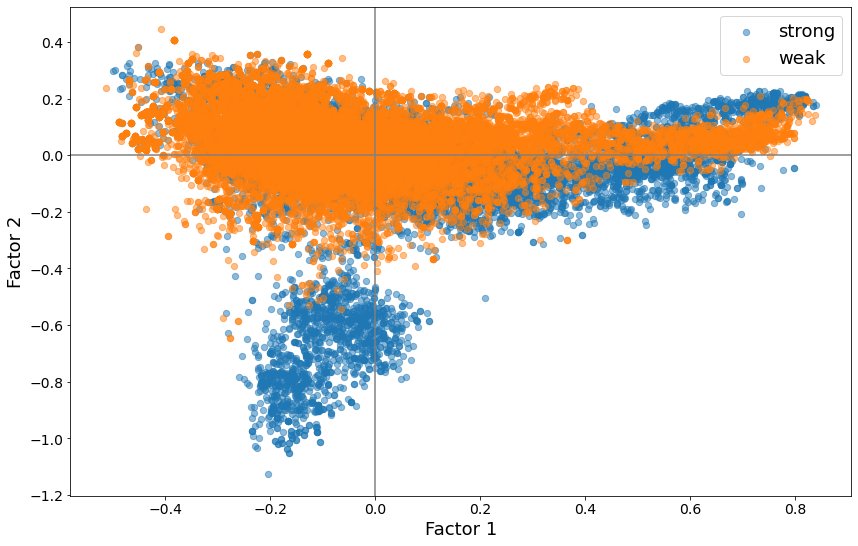

In [197]:
plt.subplots(figsize = (14, 9))
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Factor 1', fontsize = 18)
plt.ylabel('Factor 2', fontsize = 18)

for i, label in enumerate(df_main["class"].unique()):
    points = df_main.loc[df_main["class"] == label, [1, 2]]
    plt.scatter(points[1], points[2], label = label, marker = "o", s = 40, alpha = 0.5, edgecolors = None)
plt.legend(fontsize = 18)
plt.savefig("strong_v_weak_median_spearmans.jpeg", bbox_inches = "tight", dpi = 300)

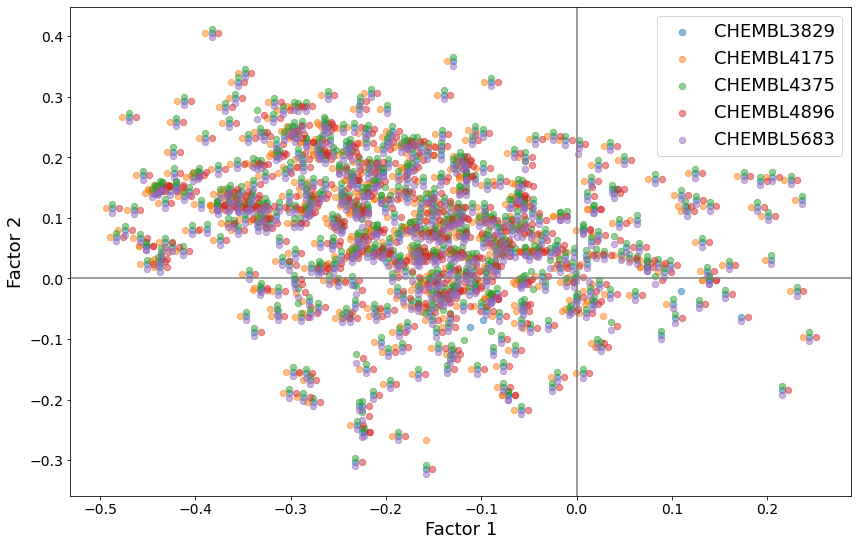

In [177]:
offset = 0.007
for_plotting = ["CHEMBL3829", "CHEMBL4175", "CHEMBL4375", "CHEMBL4896", "CHEMBL5683"]
plot_df = df_main.loc[df_main["class"].isin(for_plotting), :].reset_index(drop = True)

plot_df.loc[plot_df["class"] == "CHEMBL4896", [1]] += offset
plot_df.loc[plot_df["class"] == "CHEMBL4375", [2]] += offset
plot_df.loc[plot_df["class"] == "CHEMBL4175", [1]] -= offset
plot_df.loc[plot_df["class"] == "CHEMBL5683", [2]] -= offset


plt.subplots(figsize = (14, 9))
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Factor 1', fontsize = 18)
plt.ylabel('Factor 2', fontsize = 18)

for label in sorted(plot_df["class"].unique()):
    points = plot_df.loc[plot_df["class"] == label, [1, 2]]
    plt.scatter(points[1], points[2], label = label, marker = "o", s = 40, alpha = 0.5, edgecolors = None)
plt.legend(fontsize = 18)
plt.savefig("outliers_w_offset.jpeg", bbox_inches = "tight", dpi = 300)

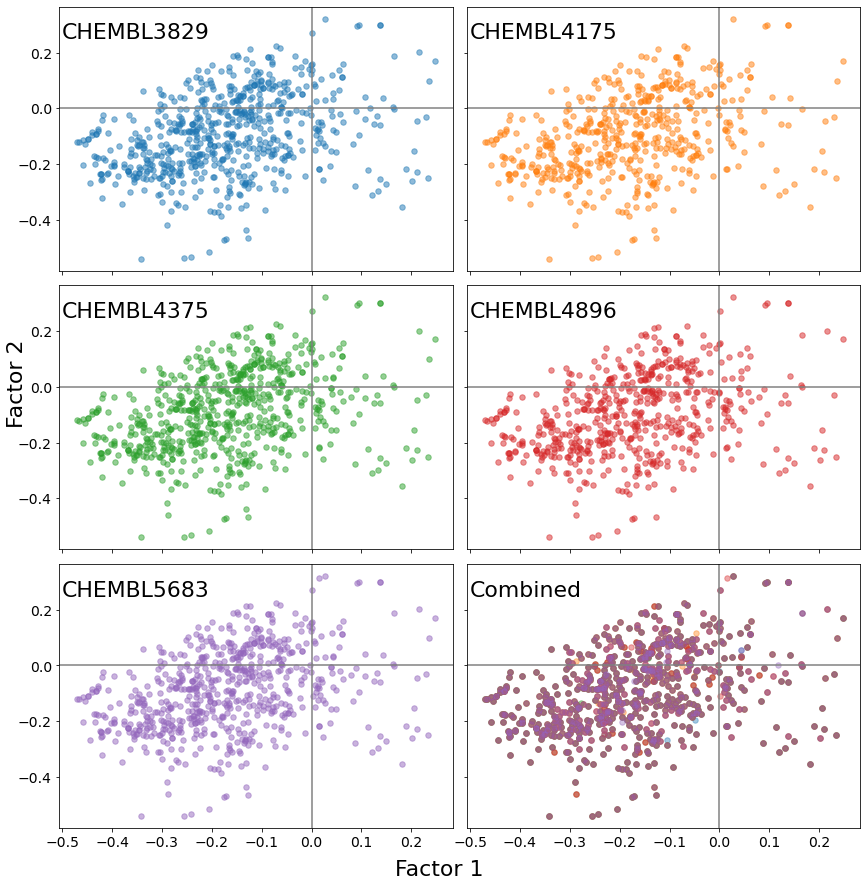

In [146]:
for_plotting = ["CHEMBL3829", "CHEMBL4175", "CHEMBL4375", "CHEMBL4896", "CHEMBL5683"]
plot_df = df_main.loc[df_main["class"].isin(for_plotting), :].reset_index(drop = True)
plt_colours = [colour for colour in mcolors.TABLEAU_COLORS]

fig, ax = plt.subplots(ncols = 2, nrows = 3, figsize = (12, 12), sharex = True, sharey = True)

for i, ax in enumerate(ax.flatten()):
    ax.axhline(0, color='gray')
    ax.axvline(0, color='gray')
    ax.tick_params(axis = "both", labelsize = 14)
    
    if i != 5:
        label = ["CHEMBL3829", "CHEMBL4175", "CHEMBL4375", "CHEMBL4896", "CHEMBL5683"][i]
        points = plot_df.loc[plot_df["class"] == label, [1, 2]]
        ax.scatter(points[1], points[2], label = label, marker = "o", color = plt_colours[i], s = 30, alpha = 0.5, edgecolors = None)
        ax.text(s = label, x = -0.5, y = 0.25, fontsize = 22)
        
    if i == 5:
        for label in plot_df["class"].unique():
            points = plot_df.loc[plot_df["class"] == label, [1, 2]]
            ax.scatter(points[1], points[2], label = label, marker = "o", s = 30, alpha = 0.4, edgecolors = None)
        ax.text(s = "Combined", x = -0.5, y = 0.25, fontsize = 22)

fig.text(s = "Factor 1", x = 0.5, y = 0, ha = "center", va = "top", fontsize = 22)
fig.text(s = "Factor 2", x = 0, y = 0.5, ha = "left", va = "bottom", fontsize = 22, rotation = 90)
plt.tight_layout()

plt.savefig("outliers_exploded.jpeg", bbox_inches = "tight", dpi = 300)

In [183]:
fig = px.scatter(df_main, x=1, y=2, color="class", symbol="class")
fig.show()

In [61]:
outlier_1 = pd.read_csv(os.getcwd() + "\\qsar_data\\CHEMBL1293251.csv")
outlier_1 = outlier_1.iloc[:, 2:]
df_outlier_1 = mul_corr_an(outlier_1)

fig = px.scatter(df_outlier_1, x=1, y=2)
fig.show()

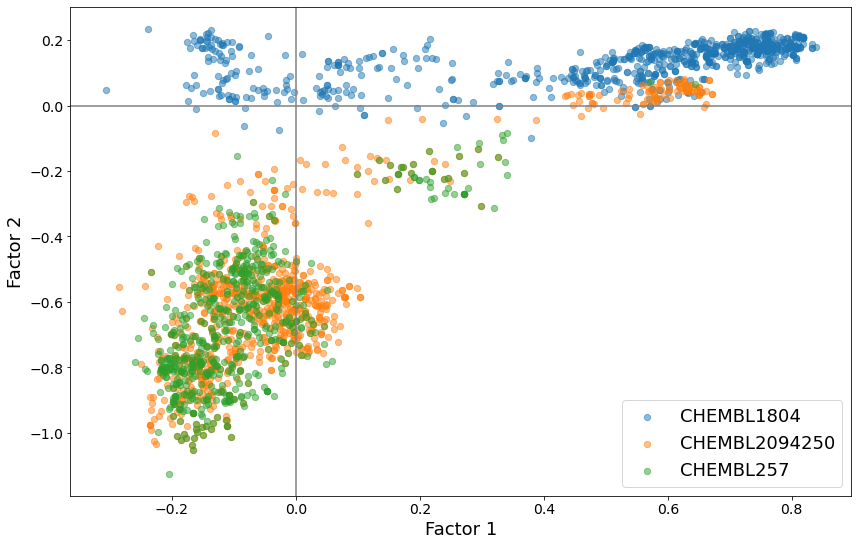

In [5]:
for_plotting = ["CHEMBL1804", "CHEMBL257", "CHEMBL2094250"]
plot_df = df_main.loc[df_main["class"].isin(for_plotting), :].reset_index(drop = True)

plt.subplots(figsize = (14, 9))
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Factor 1', fontsize = 18)
plt.ylabel('Factor 2', fontsize = 18)

for label in sorted(plot_df["class"].unique()):
    points = plot_df.loc[plot_df["class"] == label, [1, 2]]
    plt.scatter(points[1], points[2], label = label, marker = "o", s = 40, alpha = 0.5, edgecolors = None)
plt.legend(fontsize = 18)
plt.savefig("good_performers.jpeg", bbox_inches = "tight", dpi = 300)

In [20]:
import pandas as pd
import os

a = pd.read_csv(os.getcwd() + "\\qsar_data\\CHEMBL3829.csv")
b = pd.read_csv(os.getcwd() + "\\qsar_data\\CHEMBL4175.csv")
c = pd.read_csv(os.getcwd() + "\\qsar_data\\CHEMBL4375.csv")
d = pd.read_csv(os.getcwd() + "\\qsar_data\\CHEMBL4896.csv")
e = pd.read_csv(os.getcwd() + "\\qsar_data\\CHEMBL5683.csv")
                
tgt = [a, b, c, d, e]

for i in tgt:
    print(len(i.molecule_id))
l = a.molecule_id.values.tolist() + b.molecule_id.values.tolist() + c.molecule_id.values.tolist() + d.molecule_id.values.tolist() + e.molecule_id.values.tolist()

print("tgt:", len(list(set(l))))

shared = a.molecule_id.values.tolist()
shared

for i in tgt:
    shared = [x for x in shared if x in i.molecule_id.values.tolist()]
    
print("shared:", len(shared))

646
519
676
581
670
tgt: 696
shared: 434
